# Logistic regression

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import random

Implement a function that returns the linear prediction for the log of the odds ratio. It should include the bias term. `X` is a $n_d\times n_f$ array of data: $n_d$ samples with each $n_f$ features. `w` is a $n_f+1$ vector of parameters. We want the function to return a $n_d$ dimanesional vector with each component $z^{(i)}$ satisfying 

$$ z^{(i)} = w_0 +\sum_{j=1}^{n_f} w_j x_j^{(i)}\;.$$

In [159]:
def z(X,w):
    result = []
    for x in X:
        tmp = w[0]
        for i in range(len(x)):
            tmp += x[i] * w[i + 1] 
        result.append(tmp)
    return result

This tests your code:

In [160]:
Xtest = np.array([[1,2],[2,4],[3,6]])
ytest = np.array([0,0,1])
wtest = np.array([7,0,0])
assert isinstance(z(Xtest,wtest), (list, tuple, np.ndarray)), 'Return value should be an array/list/tuple'
assert (z(Xtest,wtest) == np.array([7,7,7])).all()
wtest = np.array([7,-2,1])
assert (z(Xtest,wtest) == np.array([7,7,7])).all()
wtest = np.array([7,10,1])
assert (z(Xtest,wtest) == np.array([19,31,43])).all()

Implement the sigmoid function:

In [161]:
def phi(z):
    return np.exp(z) / (np.exp(z) + 1)

Test your answer:

In [162]:
assert phi(0)==0.5
assert np.isclose(phi(np.linspace(-2,2,10)),np.array([0.11920292, 0.17428532, 0.2476638 , 0.33924363, 0.44467194,
       0.55532806, 0.66075637, 0.7523362 , 0.82571468, 0.88079708])).all()

Implement a function that returns the prediction for data $X$ and parameter vector $w$

In [163]:
def predict(X,w):
    return phi(z(X,w))

Test your implementation:

In [164]:
Xtest = np.array([[1,-3],[2,-4],[3,6]])
wtest = np.array([0.01,0.01,0.01])
assert isinstance(predict(Xtest,wtest), (list, tuple, np.ndarray)), 'Return value for this test should be an array/list/tuple'
assert isinstance(predict(Xtest,wtest)[0], float), 'Return value should be a list of floats.'
assert np.isclose(predict(Xtest,wtest),np.array([0.49750002, 0.49750002, 0.52497919])).all()

Define the cross entropy loss function for data $X$, label $y$ and parameter $w$.

In [165]:
def J(X,y,w):
    y_pred = predict(X,w)
    J = 0
    for i in range(len(y)):
        J += -1 * (y[i] * np.log(y_pred[i]) + (1 - y[i]) * (np.log(1 - y_pred[i])))
    return J

Test your implementation:

In [166]:
Xtest = np.array([[1,-3],[2,-4],[3,6]])
ytest = np.array([0,0,1])
wtest = np.array([0.01,0.01,0.01])
assert isinstance(J(Xtest, ytest, wtest), float), 'Return value should be a float.'
assert np.isclose(J(Xtest, ytest, wtest), 2.020716021089296)

For fitting the model we need gradient of the loss function. Implement it here:

In [167]:
def gradJ(X,y,w):
    y_pred = predict(X,w)
    result = []
    tmp = 0
    for i in range(len(y)):
        tmp += -1 *(y[i] - y_pred[i]) * 1
    result.append(tmp)
    for i in range(len(X[0])):
        tmp = 0
        for j in range(len(X)):
            tmp += -1 * (y[j] - y_pred[j]) * X[j][i]
        result.append(tmp)
    return result

Test your code:

In [168]:
Xtest = np.array([[1,-3],[2,-4],[3,6]])
ytest = np.array([0,0,1])
wtest = np.array([0.01,0.01,0.01])

assert isinstance(gradJ(Xtest,ytest,wtest), (list, tuple, np.ndarray)), 'Return value for this test should be an array/list/tuple'
assert isinstance(gradJ(Xtest,ytest,wtest)[0], float), 'Return value should be a list of floats.'

assert np.isclose(gradJ(Xtest,ytest,wtest), np.array([ 0.51997923,  0.06743762, -6.33262502])).all()

We can also test numerically that we got the gradient right:

In [169]:
delta = 0.00001
Jp0 = J(Xtest,ytest,wtest+[delta,0,0])
Jp1 = J(Xtest,ytest,wtest+[0,delta,0])
Jp2 = J(Xtest,ytest,wtest+[0,0,delta])
J0 = J(Xtest,ytest,wtest)
g0 = (Jp0-J0)/delta
g1 = (Jp1-J0)/delta
g2 = (Jp2-J0)/delta
assert np.isclose( gradJ(Xtest,ytest,wtest), [g0, g1, g2], rtol=1e-3).all()

We also need a function to calculate the score, that is the ratio of correctly predicted values to the total number of values predicted. 

In [170]:
def getScore(X,y,w):
    y_pred = predict(X,w)
    count = 0
    for i in range(len(y)):
        if np.round(y_pred[i], 0) == y[i]:
            count += 1
    return count / len(y)

In [171]:
Xtest = np.array([[1,-3],[2,-4],[3,6]])
ytest = np.array([0,0,1])
wtest = np.array([0.01,0.01,0.01])
assert getScore(Xtest, ytest, wtest) == 1.0
ytest = np.array([0,1,1])
assert getScore(Xtest, ytest, wtest) == 2.0/3.0
ytest = np.array([1,1,1])
assert getScore(Xtest, ytest, wtest) == 1.0/3.0

## Learning code

Define the function `learn` that takes the data `X`, the target `y`, the learning rate `eta` and the number of steps `nsteps` as arguments and returns the three vectors:
 - the value of the parameters after each step (including before the first step)
 - the value of the loss at each step
 - the value of the score at each step

Start from randomly initialized parameters in the range $[0, \, 1]$.

In [186]:
def learn(X,y,eta, nsteps):
    w = []
    ws = []
    losses = []
    scores = []
    for i in range(3):
        w.append(np.random.random())
    ws.append(w.copy())
    for i in range(nsteps):
        w_grad = gradJ(X,y,w)
        for j in range(len(w)):
            w[j] -= eta * w_grad[j]
        ws.append(w.copy())
        losses.append(J(X,y,w))
        scores.append(getScore(X,y,w))
    return np.array(ws), losses, scores

This function will show you plots for the learning of your algorithm if you provide the above mentionned vectors.

In [187]:
def makePlots(ws, js, scores):
    plt.figure(figsize=(15,10))
    plt.subplot(221)
    plt.plot(ws[:,0])
    plt.plot(ws[:,1])
    plt.plot(ws[:,2])
    plt.title("Parameters")
    
    plt.subplot(222)
    
    plt.plot(js)
    plt.yscale('log')
    plt.title('loss')
    
    plt.subplot(223)
    plt.plot(scores)
    plt.title('scores')

## Cancer data

We start we a dataset of benign and malignent cancer cases. We only look at two features.

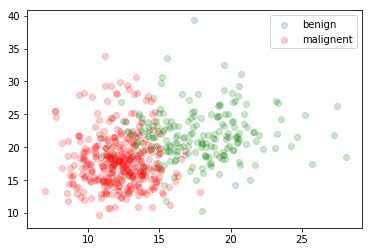

In [197]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
#only take two features
X = cancer.data[:,:2]
y = cancer.target
malignent = cancer.data[y==1]
benign = cancer.data[y==0]
xb, yb = benign[:,0],benign[:,1]
xm, ym = malignent[:,0],malignent[:,1]
plt.scatter(xb,yb,color='g',alpha=0.2,label='benign')
plt.scatter(xm,ym,color='r',alpha=0.2,label='malignent')
plt.legend();

Here we normalise the features before learning.

In [198]:
av = np.average(X,axis=0)
sc = np.std(X,axis=0)
X = (X-av)/sc

Experiment with different learning rates and number of steps! Try without normalising the features.

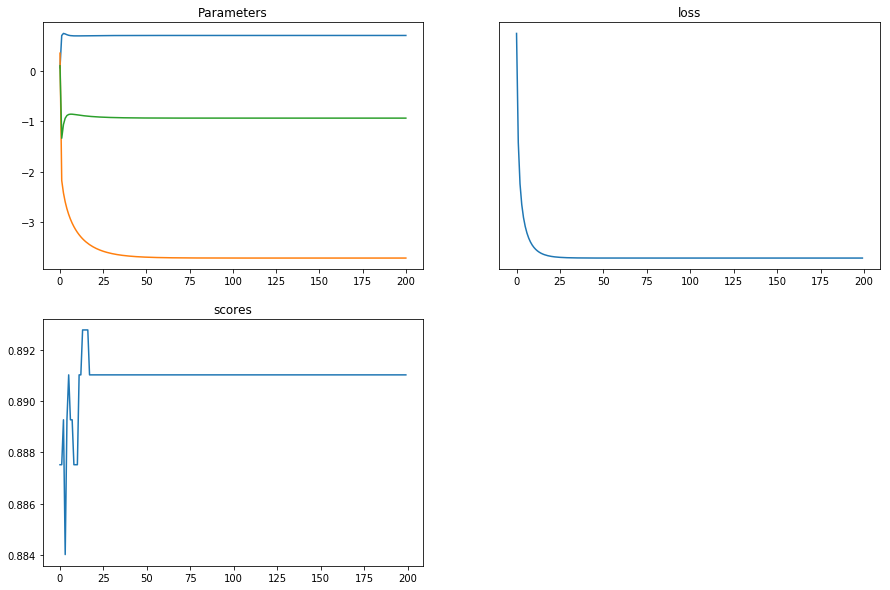

In [199]:
ws, js, scores = learn(X, y, eta= 0.01, nsteps = 200)
makePlots(ws, js, scores)

## Iris dataset

Here we use a different data set. This time the data is linearly separable. What is different? Is the decision boundary better than with the perceptron algorithm?

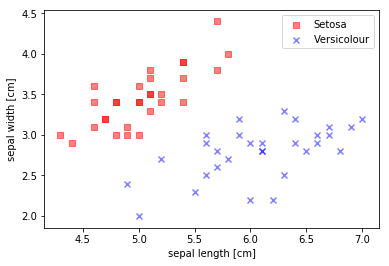

In [193]:
from sklearn import datasets
data_dic = datasets.load_iris()
features = data_dic['data']
targets = data_dic['target']

c1 = features[targets==0]
c2 = features[targets==1]
c3 = features[targets==2]


def subSample(nData):
    X = np.empty((2*nData,2))
    X[:nData] = c1[:nData,:2]
    X[nData:] = c2[:nData,:2]
    Y = np.empty(2*nData)
    Y[:nData] = np.ones(nData)
    Y[nData:] = np.zeros(nData)
    return X,Y

nData = 30
X, Y = subSample(nData)

# plot

X[Y==0]
c1 = X[Y==1]
c2 = X[Y==0]
plt.scatter(c1[:,0],c1[:,1], color='red', marker='s', alpha=0.5, label="Setosa")
plt.scatter(c2[:,0],c2[:,1], color='blue', marker='x', alpha=0.5, label="Versicolour")
plt.legend()
plt.xlabel("sepal length [cm]")
plt.ylabel("sepal width [cm]");



Experiment with different step numbers and learning rates.

In [194]:
av = np.average(X,axis=0)
sc = np.std(X,axis=0)
X = (X-av)/sc

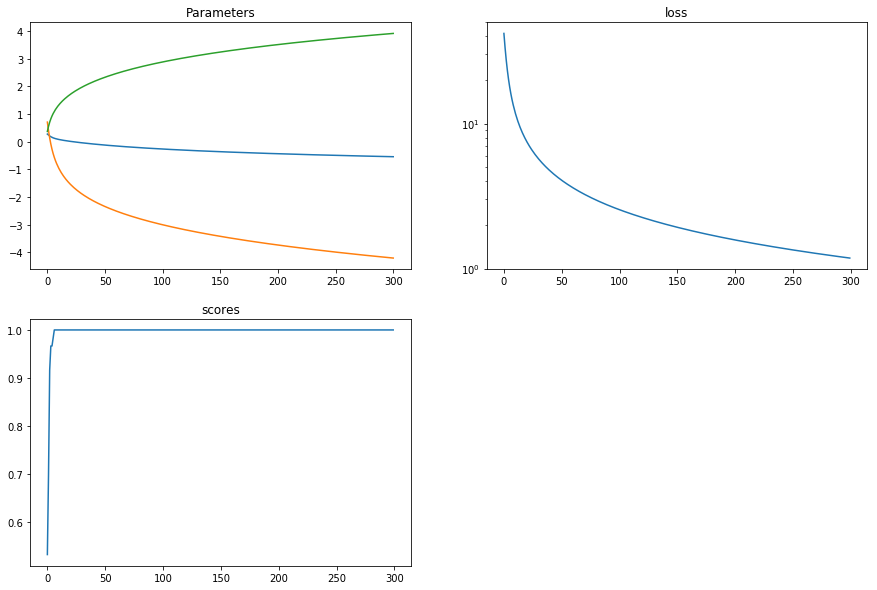

In [195]:
ws, js, scores = learn(X, Y, eta= 0.01, nsteps = 300)
makePlots(ws, js, scores)

Does it make a difference to normalise the features? Do the parameters stabilize to a given value? Can you explain why?

For the question above, they are different. Because for the linearly separable one, the paramaters cannot converge. Compared with percepton algorithm, logistic regression is better if it is not linear seperable and they can both give the right answer for their labels if the data is linear seperable. 

For the question below, Yes. It become smooth when we normalise the features. They will not stable in a given value because it cannot converge.

As the sigmoid function, $h(x)=\frac{1}{1+\mathrm{e}^{-w^{T} x}}$, so any probability can only be close to 1 or 0, but they cannot be equal to 1 or 0. If it is linear seperable, k * w has lower cross entropy than w (k > 1), so the function is convex but it cannot converge.